# 🧪 Data Pipeline Development using Pandas and Scikit-learn

## 📌 Objective
To automate the data preprocessing workflow using an ETL pipeline that:
- Loads raw customer churn data
- Cleans and preprocesses it
- Transforms it using encoding and scaling
- Splits it into train/test sets
- Saves the processed data

Dataset used: Telco Customer Churn (CSV)


In [1]:
!pip install matplotlib seaborn


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots
%matplotlib inline


In [5]:
data = pd.read_csv("data/projectdata.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 📊 Exploratory Data Analysis (EDA) and Visualizations


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12092\3009105318.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Churn", palette="Set2")


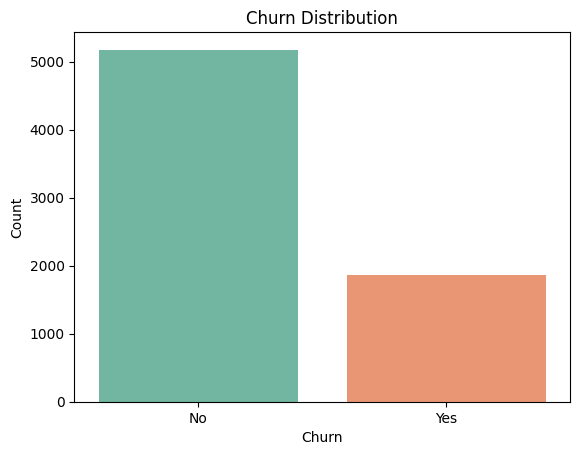

In [6]:
sns.countplot(data=data, x="Churn", palette="Set2")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


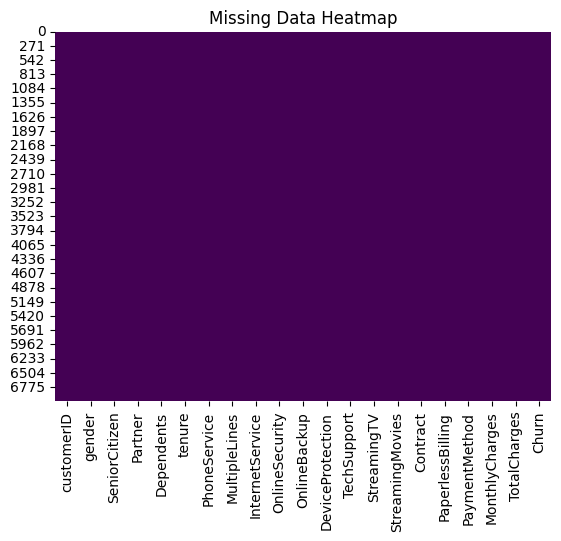

In [7]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


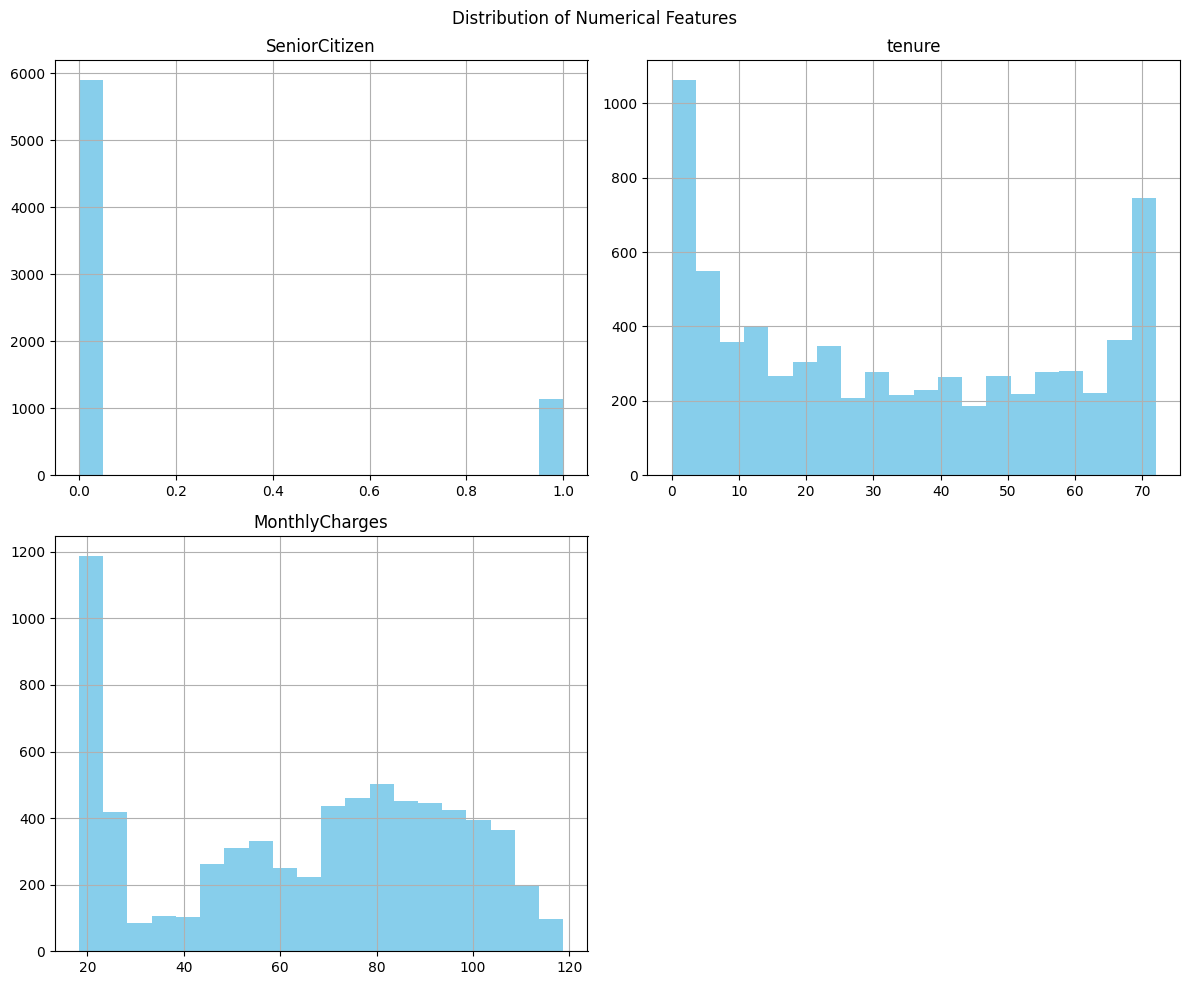

In [8]:
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns

data[numerical_cols].hist(figsize=(12, 10), bins=20, color="skyblue")
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()


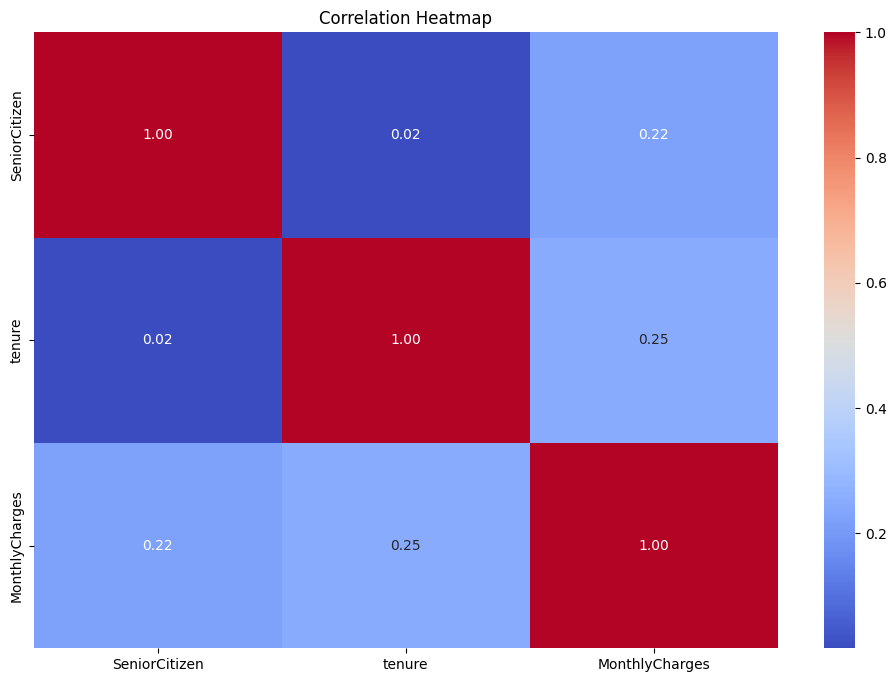

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


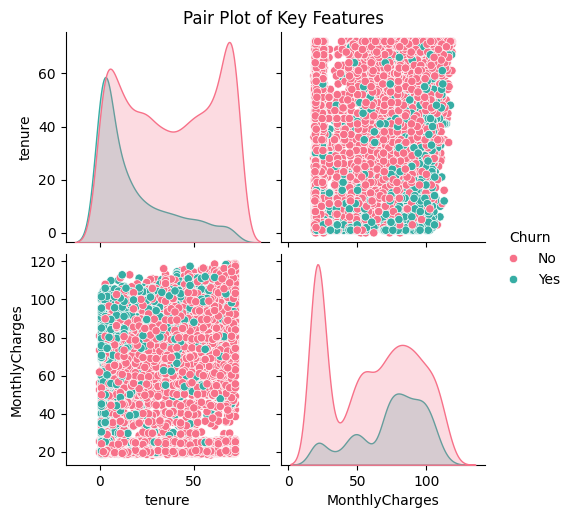

In [10]:
selected_cols = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"]
sns.pairplot(data[selected_cols], hue="Churn", palette="husl")
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()


In [11]:
# Drop duplicates
data.drop_duplicates(inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Confirm cleanup
print(f"Dataset shape after cleaning: {data.shape}")


Dataset shape after cleaning: (7043, 21)


In [12]:
X = data.drop("Churn", axis=1)
y = data["Churn"]


In [13]:
# You can manually define them if auto detection doesn't work well
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "bool"]).columns.tolist()

print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)


Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [14]:
numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])


In [15]:
X_processed = preprocessor.fit_transform(X)
print(f"Processed feature shape: {X_processed.shape}")


Processed feature shape: (7043, 13618)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (5634, 13618), Test shape: (1409, 13618)


In [17]:
output_folder = "processed_data"
os.makedirs(output_folder, exist_ok=True)

pd.DataFrame(X_train).to_csv(f"{output_folder}/X_train.csv", index=False)
pd.DataFrame(X_test).to_csv(f"{output_folder}/X_test.csv", index=False)
y_train.to_csv(f"{output_folder}/y_train.csv", index=False)
y_test.to_csv(f"{output_folder}/y_test.csv", index=False)

print("✅ Processed data saved to 'processed_data/' folder.")


✅ Processed data saved to 'processed_data/' folder.


## ✅ Conclusion

- The dataset was cleaned, encoded, and scaled.
- Final data was split into training and testing sets.
- Processed files were saved in the `processed_data/` folder.
- Ready for model training or further analysis!
